**Prediction model for footbal matches in the premier league

Business understanding
The aim of this project is to develop a predictive analytics solution for Premier League match outcomes using advanced machine learning techniques—Random Forest and Naive Bayes classifiers. By leveraging historical match data, team statistics, and player performance metrics, the model will forecast match results to drive data-informed decisions for stakeholders such as sports analysts, betting agencies, and football clubs.

In [230]:
#data understanding: looking at the data
import pandas as pd
df = pd.read_csv('matches.csv')
matches = pd.read_csv('matches.csv', index_col=0)
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [231]:
matches.shape

(1389, 27)

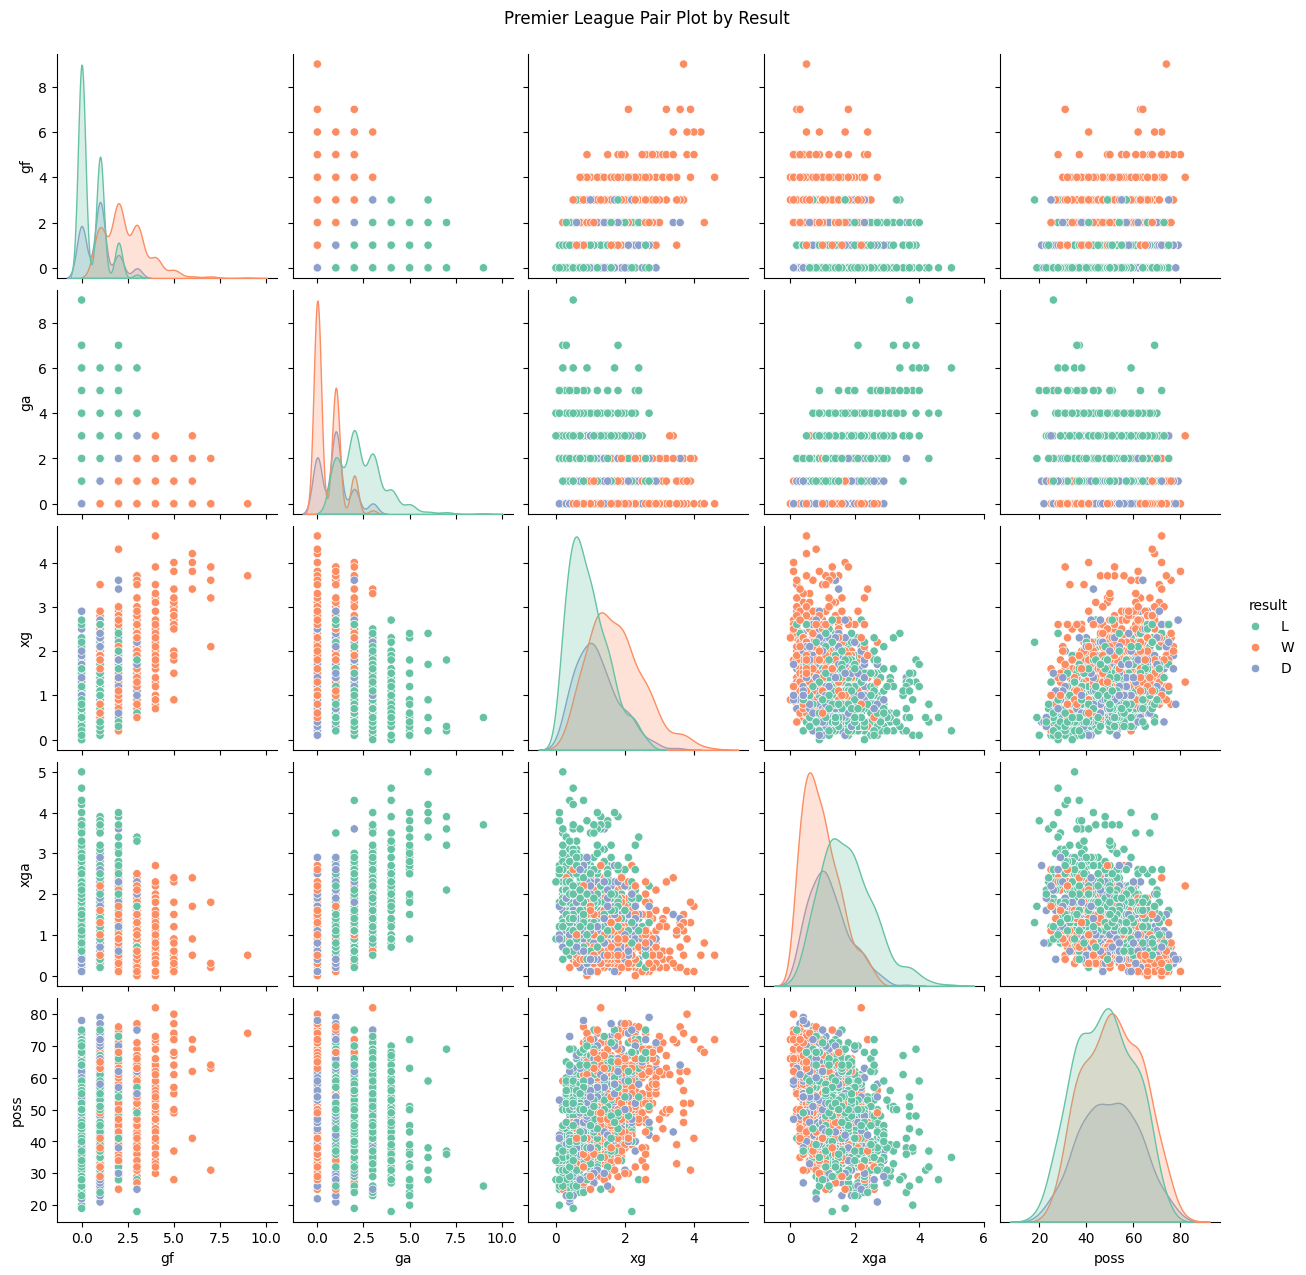

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns in your dataset
numeric_cols = [
    'gf', 'ga', 'xg', 'xga', 'poss'
]

# Filter only columns present in the DataFrame
available_cols = [col for col in numeric_cols if col in df.columns]

# Drop rows with missing data in selected columns and 'result'
df_plot = df[available_cols + ['result']].dropna()

# Create pair plot, color by match result
sns.pairplot(df_plot, hue='result', diag_kind='kde', palette='Set2')
plt.suptitle("Premier League Pair Plot by Result", y=1.02)
plt.show()



Pair Plot Interpretation: Premier League Match Statistics by Result

Goals For (gf):
Winning teams (W, orange) tend to have higher goals for values, shown by the orange peak on the right side of the 'gf' density plot.
Losing teams (L, green) cluster on lower 'gf' values, as seen by the green peak on the left.
Draws (D, blue) are concentrated around lower-middle 'gf'.

Goals Against (ga):
Matches lost (green) show higher 'ga', while wins (orange) appear mostly at low 'ga' values.
Draws (blue) cluster around moderate 'ga'.
Expected Goals (xg) and Expected Goals Against (xga):
Teams with higher 'xg' are more likely to win, as indicated by orange points towards higher 'xg'.
Higher 'xga' is linked to losses (more green at high 'xga' values).

Possession (poss):
Possession distribution is broad across all outcomes, but wins appear slightly more common at higher possession values.
There’s less clear separation in possession alone for result prediction.

Pairwise Relationships:
There is a positive correlation between 'gf' and 'xg', showing that expected goals are predictive for goals scored.
'ga' and 'xga' also correlate, as expected.
Most winning results cluster where 'gf' and 'xg' are both high, while losses occur with high 'ga' and 'xga'.

Insights:
The plot confirms that higher goals (and expected goals) are strong indicators of wins, and teams that concede more (and have higher xga) tend to lose.
Possession alone is less discriminative for predicting outcomes but may play a supporting role.
These patterns validate the use of these variables as features for outcome prediction models.

In [233]:
#Data preparation
#checkig for missing values
38*20*2 # there are 38 match weeks, 20 teams, each team plays 2 matches per week
matches.isnull().sum() # no missing values

date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       696
captain            0
formation          0
referee            0
match report       0
notes           1389
sh                 0
sot                0
dist               1
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [234]:
matches ['team']. value_counts()#checking for number of matches played by each team

team
Manchester United           72
West Ham United             72
Newcastle United            72
Brighton and Hove Albion    72
Southampton                 72
Tottenham Hotspur           71
Manchester City             71
Leeds United                71
Wolverhampton Wanderers     71
Arsenal                     71
Crystal Palace              71
Burnley                     71
Chelsea                     70
Aston Villa                 70
Leicester City              70
Everton                     70
West Bromwich Albion        38
Fulham                      38
Liverpool                   38
Sheffield United            38
Brentford                   34
Norwich City                33
Watford                     33
Name: count, dtype: int64

In [235]:
#checking matches for liverpool for missing match values
matches[matches['team']=='Liverpool']

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2020-09-12,17:30,Premier League,Matchweek 1,Sat,Home,W,4.0,3.0,Leeds United,...,Match Report,NaN,20.0,4.0,17.0,0.0,2.0,2.0,2021,Liverpool
2,2020-09-20,16:30,Premier League,Matchweek 2,Sun,Away,W,2.0,0.0,Chelsea,...,Match Report,NaN,17.0,5.0,17.7,1.0,0.0,0.0,2021,Liverpool
4,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Home,W,3.0,1.0,Arsenal,...,Match Report,NaN,21.0,9.0,16.8,0.0,0.0,0.0,2021,Liverpool
6,2020-10-04,19:15,Premier League,Matchweek 4,Sun,Away,L,2.0,7.0,Aston Villa,...,Match Report,NaN,14.0,8.0,15.8,1.0,0.0,0.0,2021,Liverpool
7,2020-10-17,12:30,Premier League,Matchweek 5,Sat,Away,D,2.0,2.0,Everton,...,Match Report,NaN,22.0,8.0,15.0,1.0,0.0,0.0,2021,Liverpool
9,2020-10-24,20:00,Premier League,Matchweek 6,Sat,Home,W,2.0,1.0,Sheffield Utd,...,Match Report,NaN,17.0,5.0,18.2,1.0,0.0,0.0,2021,Liverpool
11,2020-10-31,17:30,Premier League,Matchweek 7,Sat,Home,W,2.0,1.0,West Ham,...,Match Report,NaN,8.0,2.0,18.6,1.0,1.0,1.0,2021,Liverpool
13,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Away,D,1.0,1.0,Manchester City,...,Match Report,NaN,9.0,2.0,21.5,0.0,1.0,1.0,2021,Liverpool
14,2020-11-22,19:15,Premier League,Matchweek 9,Sun,Home,W,3.0,0.0,Leicester City,...,Match Report,NaN,24.0,12.0,11.9,0.0,0.0,0.0,2021,Liverpool
16,2020-11-28,12:30,Premier League,Matchweek 10,Sat,Away,D,1.0,1.0,Brighton,...,Match Report,NaN,6.0,2.0,20.9,0.0,0.0,0.0,2021,Liverpool


In [236]:
#there is missing data for liverpool because they played 38 matches instead of 76
#this is because there is missing data for the next season
#now take a look at the match data

matches['round'].value_counts()

round
Matchweek 1     39
Matchweek 2     39
Matchweek 3     39
Matchweek 4     39
Matchweek 5     39
Matchweek 6     39
Matchweek 7     39
Matchweek 8     39
Matchweek 9     39
Matchweek 10    39
Matchweek 11    39
Matchweek 12    39
Matchweek 13    39
Matchweek 14    39
Matchweek 15    39
Matchweek 16    39
Matchweek 17    39
Matchweek 19    39
Matchweek 20    39
Matchweek 25    39
Matchweek 24    39
Matchweek 23    39
Matchweek 34    39
Matchweek 29    39
Matchweek 31    39
Matchweek 26    39
Matchweek 28    39
Matchweek 32    39
Matchweek 18    37
Matchweek 21    37
Matchweek 22    37
Matchweek 27    37
Matchweek 30    37
Matchweek 33    32
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: count, dtype: int64

the matches are 39 beceause liverpool has not played these matches yet in this data set. The other missing matches is also from when this data set is made.

In [237]:
#cleaning the data looking at the data types
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

In [238]:
#converting data types for the date to time for the machinelearning
matches['date'] = pd.to_datetime(matches['date'])
matches.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                     float64
pkatt                  float64
season                   int64
team                    object
dtype: object

In [239]:
#Modeling
#creating predictors for machine learning
matches['venuecode'] = matches['venue'].astype('category').cat.codes #converting the home or away to a numeric colum

In [240]:
matches['op_code'] = matches['opponent'].astype('category').cat.codes #converting the opponent to a numeric column

In [241]:
matches['hour'] = matches ['time'].str.replace(":.+","", regex=True).astype('int') # extracting the hour from the time column to check if it affects the outcome of the match + changing the minuets for number for the model to learn

In [242]:
matches ['day_code'] = matches['date'].dt.dayofweek # extracting the day of the week from the date column to check if it affects the outcome of the match

Setting targets for the model to predict: the team to win or not

In [243]:
matches['target'] = (matches['result'] == 'W').astype('int') # Setting targets for the model to predict: the team to win or not

In [244]:
matches


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venuecode,op_code,hour,day_code,target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,1
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,0.0,0.0,0.0,2021,Sheffield United,0,18,19,6,0
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,1.0,0.0,0.0,2021,Sheffield United,1,6,15,5,0
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,0.0,0.0,0.0,2021,Sheffield United,0,7,19,6,1
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,1.0,0.0,0.0,2021,Sheffield United,0,14,18,2,0


Creating the initial model and train it.
One of the first steps to train the model is to split it is to evaluate it. If the data is trained on data it knows it will preform well. So when it is with data outside of the known data it can be valued soit can predict future matches.

In [245]:
from sklearn.ensemble import RandomForestClassifier #is a model for non linear in the data (like the opponet code)

In [246]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [247]:
#splitting the data into training and testing sets
#this is done so that the model can be tested on data it has not seen before
train = matches[matches['date'] < '2022-01-01']
test = matches[matches['date'] > '2022-01-01']

predictors = ['venuecode', 'op_code', 'hour', 'day_code'] # the predictors that will be used to predict the target
rf.fit(train[predictors], train['target']) # training the model
RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)
pred = rf.predict(test[predictors]) # predicting the target for the test set
from sklearn.metrics import accuracy_score # importing the accuracy score function to check the accuracy of the model
acc = accuracy_score(test['target'], pred) # checking the accuracy of the model

In [248]:
acc #testing the model accuracy to see how well it performs on unseen data

0.6123188405797102

Not a bad start. It can already predict 61.12% of the time the right answer. Now to check in what situations the accuracy is high or it is low.

In [249]:
#to look at the predictions in high and low accuracy situations
combined = pd.DataFrame(dict(actual=test['target'], prediction=pred)) # combining the actual and predicted values into a dataframe

In [250]:
pd.crosstab(index=combined['actual'], columns=combined['prediction']) # creating a confusion matrix to see how well the model performed

prediction,0,1
actual,,
0,141,31
1,76,28


141 we were correct and 76 times we were wrong. When a win was predicted there where more wrong predictions then there where right preditions. So the accuracy matrix has to be tweaked.

In [251]:
from sklearn.metrics import precision_score# importing precision and recall score functions to check the precision and recall of the model
precision_score(test['target'], pred) # checking the precision of the model

0.4745762711864407

So when a win was predicted the prediction was only 47% accurate so this moddel can be improved. 
Now to imporve the precision with rolling averages (creating more predictors). The matches dataframe has to be split up by team to compute rolling averages. So we can look at the stats per team like goals scored against 

In [252]:
grouped_matches = matches.groupby('team') # grouping the matches by team
group = grouped_matches.get_group('Manchester City') # getting the group for Manchester City
group


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venuecode,op_code,hour,day_code,target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,1
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2021-05-01,12:30,Premier League,Matchweek 34,Sat,Away,W,2.0,0.0,Crystal Palace,...,1.0,0.0,0.0,2021,Manchester City,0,6,12,5,1
56,2021-05-08,17:30,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Chelsea,...,0.0,0.0,1.0,2021,Manchester City,1,5,17,5,0
57,2021-05-14,20:00,Premier League,Matchweek 36,Fri,Away,W,4.0,3.0,Newcastle Utd,...,1.0,0.0,0.0,2021,Manchester City,0,14,20,4,1
58,2021-05-18,19:00,Premier League,Matchweek 37,Tue,Away,L,2.0,3.0,Brighton,...,1.0,0.0,0.0,2021,Manchester City,0,3,19,1,0


In [253]:
def rolling_averages(group, cols, new_cols): # defining a function to calculate rolling averages for the specified columns
    group = group.sort_values('date') # sorting the group by date
    rolling_stats = group[cols].rolling(3, closed='left').mean() # calculating the rolling averages for the specified columns closing left to exclude future data
    group[new_cols] = rolling_stats # adding the rolling averages to the group
    group = group.dropna(subset=new_cols) # dropping any rows with missing values in the new columns
    return group

cols = ['gf', 'ga', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']
new_cols = [f"{c}_rolling" for c in cols]

new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [254]:
rolling_averages(group, cols, new_cols) # calculating the rolling averages for Manchester City

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
5,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,W,1.0,0.0,Arsenal,...,5,1,2.000000,2.333333,17.333333,4.666667,18.900000,1.333333,0.333333,0.333333
7,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,D,1.0,1.0,West Ham,...,5,0,1.333333,2.000000,17.333333,3.666667,17.733333,0.666667,0.000000,0.000000
9,2020-10-31,12:30,Premier League,Matchweek 7,Sat,Away,W,1.0,0.0,Sheffield Utd,...,5,1,1.000000,0.666667,16.666667,4.333333,18.233333,0.666667,0.000000,0.000000
11,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Home,D,1.0,1.0,Liverpool,...,6,0,1.000000,0.333333,14.333333,6.666667,18.466667,1.000000,0.000000,0.000000
12,2020-11-21,17:30,Premier League,Matchweek 9,Sat,Away,L,0.0,2.0,Tottenham,...,5,0,1.000000,0.666667,12.000000,5.666667,19.366667,1.000000,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,2022-03-14,20:00,Premier League,Matchweek 29,Mon,Away,D,0.0,0.0,Crystal Palace,...,0,0,2.333333,1.333333,19.000000,7.000000,15.366667,0.333333,0.333333,0.333333
44,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Away,W,2.0,0.0,Burnley,...,5,1,1.666667,0.333333,18.333333,7.333333,16.000000,0.333333,0.000000,0.000000
46,2022-04-10,16:30,Premier League,Matchweek 32,Sun,Home,D,2.0,2.0,Liverpool,...,6,0,2.000000,0.333333,20.000000,6.666667,16.133333,0.333333,0.000000,0.000000
49,2022-04-20,20:00,Premier League,Matchweek 30,Wed,Home,W,3.0,0.0,Brighton,...,2,1,1.333333,0.666667,15.666667,4.666667,16.700000,0.333333,0.000000,0.000000


In [255]:
matches_rolling = matches.groupby('team').apply(lambda x: rolling_averages(x, cols, new_cols)) # applying the rolling averages function to all teams and resetting the index
matches_rolling

C:\Users\tweakers\AppData\Local\Temp\ipykernel_6140\3778576033.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches.groupby('team').apply(lambda x: rolling_averages(x, cols, new_cols)) # applying the rolling averages function to all teams and resetting the index


date   time            comp         round  \
team                                                                         
Arsenal                 6  2020-10-04  14:00  Premier League   Matchweek 4   
                        7  2020-10-17  17:30  Premier League   Matchweek 5   
                        9  2020-10-25  19:15  Premier League   Matchweek 6   
                        11 2020-11-01  16:30  Premier League   Matchweek 7   
                        13 2020-11-08  19:15  Premier League   Matchweek 8   
...                               ...    ...             ...           ...   
Wolverhampton Wanderers 32 2022-03-13  14:00  Premier League  Matchweek 29   
                        33 2022-03-18  20:00  Premier League  Matchweek 30   
                        34 2022-04-02  15:00  Premier League  Matchweek 31   
                        35 2022-04-08  20:00  Premier League  Matchweek 32   
                        36 2022-04-24  14:00  Premier League  Matchweek 34   

                            day venue result   gf   ga         opponent  ...  \
team                                                                     ...   
Arsenal                 6   Sun  Home      W  2.0  1.0    Sheffield Utd  ...   
                        7   Sat  Away      L  0.0  1.0  Manchester City  ...   
                        9   Sun  Home      L  0.0  1.0   Leicester City  ...   
                        11  Sun  Away      W  1.0  0.0   Manchester Utd  ...   
                        13  Sun  Home      L  0.0  3.0      Aston Villa  ...   
...                         ...   ...    ...  ...  ...              ...  ...   
Wolverhampton Wanderers 32  Sun  Away      W  1.0  0.0          Everton  ...   
                        33  Fri  Home      L  2.0  3.0     Leeds United  ...   
                        34  Sat  Home      W  2.0  1.0      Aston Villa  ...   
                        35  Fri  Away      L  0.0  1.0    Newcastle Utd  ...   
                        36  Sun  Away      L  0.0  1.0          Burnley  ...   

                            day_code  target  gf_rolling  ga_rolling  \
team                                                                   
Arsenal                 6          6       1    2.000000    1.333333   
                        7          5       0    1.666667    1.666667   
                        9          6       0    1.000000    1.666667   
                        11         6       1    0.666667    1.000000   
                        13         6       0    0.333333    0.666667   
...                              ...     ...         ...         ...   
Wolverhampton Wanderers 32         6       1    1.333333    1.000000   
                        33         4       0    1.666667    0.666667   
                        34         5       1    2.333333    1.000000   
                        35         4       0    1.666667    1.333333   
                        36         6       0    1.333333    1.666667   

                           sh_rolling sot_rolling dist_rolling fk_rolling  \
team                                                                        
Arsenal                 6    7.666667    3.666667    14.733333   0.666667   
                        7    5.333333    3.666667    15.766667   0.000000   
                        9    7.000000    3.666667    16.733333   0.666667   
                        11   9.666667    4.000000    16.033333   1.000000   
                        13   9.666667    2.666667    18.033333   1.000000   
...                               ...         ...          ...        ...   
Wolverhampton Wanderers 32  12.333333    3.666667    19.300000   0.000000   
                        33  12.333333    4.333333    19.600000   0.000000   
                        34  13.000000    5.333333    19.833333   0.000000   
                        35  13.000000    5.000000    18.533333   0.000000   
                        36  10.000000    4.666667    17.633333   0.000000   

                            pk_rolling

So on the left there is every teams as an index this is not needed. Idex is how a specific row is called in pandas. There are 1317 rows but the index doesnt go that high this means a lot of valueas are repeated but we need more unique valueas

In [256]:
matches_rolling = matches_rolling.droplevel('team') # dropping the team level from the index
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
7,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
9,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
11,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
13,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
33,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
34,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
35,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


In [257]:
matches_rolling.index = range(matches_rolling.shape[0]) # resetting the index
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
1,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
2,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
3,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
4,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
1313,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
1314,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
1315,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


In [258]:
df['target'] = df['result'].map({'D': 0, 'L': 1, 'W': 2})


Now to retrain the model with the new predictors

In [259]:
def make_predictions(data, predictors): # defining a function to make predictions using the random forest model
    train = data[data['date'] < '2022-01-01'] # splitting the data into training and testing sets
    test = data[data['date'] > '2022-01-01']
    rf.fit(train[predictors], train['target']) # training the model
    pred = rf.predict(test[predictors]) # predicting the target for the test set
    combined = pd.DataFrame(dict(actual=test['target'], prediction=pred), index=test.index) # combining the actual and predicted values into a dataframe
    precision = precision_score(test['target'], pred) # calculating the precision of the model
    return combined, precision

In [261]:
combined, precision = make_predictions(matches_rolling, predictors + new_cols) # making predictions using the rolling averages as additional predictors
precision # checking the precision of the model with the rolling averages as additional predictors

0.625

So the precsion is now improved a bit from 47% to 62%. Lets look at combined to see where the mis predictions are.

In [ ]:
combined = combined.merge(matches_rolling[['date', 'team','opponent', 'result']], left_index=True, right_index=True) # merging the combined dataframe with the matches_rolling dataframe to get the date, opponent, and result columns
combined

,actual,prediction,date,team,opponent,result
55,0,0,2022-01-23,Arsenal,Burnley,D
56,1,0,2022-02-10,Arsenal,Wolves,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolves,W
59,1,1,2022-03-06,Arsenal,Watford,W
...,...,...,...,...,...,...
1312,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W
1313,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L
1314,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W
1315,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L


Combining home and away data. Now we want to know: how did the algorithm at both sides of the matches? The alogrithm could have predicted different home and away results. 

In [ ]:
class MissingDict(dict):
    def __missing__(self, key):
        return key # if the key is missing, return the team name

map_values = {
    'Brighton and Hove Albion': 'Brighton',
    'Manchester United': 'Mancester Utd',
    'Newcastle United': 'Newcastle Utd',
    'Tottenham Hotspur': 'Tottenham',
    'West Ham United': 'West Ham',
    'Wolverhampton Wanderers': 'Wolves'
}

mapping = MissingDict(**map_values) # creating a mapping dictionary to map the team names to the shorter names


In [ ]:
mapping['Arsenal']  # returns 'Arsenal' (the key itself)



'Arsenal'

In [ ]:
combined['opponent'] = combined['opponent'].str.strip()
combined['opponent'] = combined['opponent'].str.title()  # or upper/lower consistent with mapping keys


In [ ]:
combined['new_team'] = combined['team'].map(mapping) # mapping the team names to the shorter names
combined

,actual,prediction,date,team,opponent,result,new_team
55,0,0,2022-01-23,Arsenal,Burnley,D,Arsenal
56,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal
57,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal
58,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal
59,1,1,2022-03-06,Arsenal,Watford,W,Arsenal
...,...,...,...,...,...,...,...
1312,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves
1313,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves
1314,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves
1315,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves


In [ ]:
combined['opponent_mapped'] = combined['opponent'].map(mapping)


In [ ]:
missing_opponents = combined.loc[combined['opponent_mapped'].isna(), 'opponent'].unique()
print("Opponents missing in mapping:", missing_opponents)



Opponents missing in mapping: []


In [ ]:
#now the teamfield is in the dataframe that can be used to merge the data frame with itself
merged = combined.merge(combined, left_on=['date', 'new_team'], right_on=['date', 'opponent'])# 
merged                                                                        

,actual_x,prediction_x,date,team_x,opponent_x,result_x,new_team_x,opponent_mapped_x,actual_y,prediction_y,team_y,opponent_y,result_y,new_team_y,opponent_mapped_y
0,0,0,2022-01-23,Arsenal,Burnley,D,Arsenal,Burnley,0,0,Burnley,Arsenal,D,Burnley,Arsenal
1,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal,Wolves,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves,Arsenal
2,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal,Brentford,0,0,Brentford,Arsenal,L,Brentford,Arsenal
3,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal,Wolves,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves,Arsenal
4,1,1,2022-03-06,Arsenal,Watford,W,Arsenal,Watford,0,0,Watford,Arsenal,L,Watford,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves,Everton,0,0,Everton,Wolves,L,Everton,Wolves
243,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves,Leeds United,1,0,Leeds United,Wolves,W,Leeds United,Wolves
244,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves,Aston Villa,0,0,Aston Villa,Wolves,L,Aston Villa,Wolves
245,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves,Newcastle Utd,1,0,Newcastle United,Wolves,W,Newcastle Utd,Wolves


In [ ]:
merged[(merged['prediction_x'] == 1) & (merged['prediction_y'] == 0)]['actual_x'].value_counts()


actual_x
1    25
0    11
Name: count, dtype: int64

In [ ]:
print(classification_report(test['target'], pred, labels=[0, 1], target_names=le.classes_))

              precision    recall  f1-score   support

           D       0.65      0.82      0.72       172
           L       0.47      0.27      0.34       104

    accuracy                           0.61       276
   macro avg       0.56      0.54      0.53       276
weighted avg       0.58      0.61      0.58       276



C:\Users\tweakers\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:2964: UserWarning: labels size, 2, does not match size of target_names, 3
  warnings.warn(


We are pretty acurate with 25/36= 69,4%

##Native Bayes

In [ ]:
# If venue is 'Home' or 'Away', convert to numeric:
df['venue_encoded'] = df['venue'].map({'Home': 1, 'Away': 0})


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_venue = LabelEncoder()
df['venue_encoded'] = le_venue.fit_transform(df['venue'])


In [ ]:
#Prepare features and target
features = ['gf', 'ga', 'xg', 'xga', 'poss', 'venue_encoded']  
X = df[features]

target = 'result'

df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]


In [ ]:
#encode the target
from sklearn.preprocessing import LabelEncoder

target = 'result'  # This is the column to predict (Win/Draw/Loss)
y = df[target]

le = LabelEncoder()
y_encoded = le.fit_transform(y)




In [ ]:
#split the data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the Naive Bayes classifier
nb = GaussianNB()

# Train (fit) it using training data
nb.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = nb.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification metrics
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.7482014388489209
              precision    recall  f1-score   support

           D       0.48      0.70      0.57        63
           L       0.90      0.75      0.82       110
           W       0.85      0.77      0.81       105

    accuracy                           0.75       278
   macro avg       0.75      0.74      0.73       278
weighted avg       0.79      0.75      0.76       278

[[44  8 11]
 [24 83  3]
 [23  1 81]]


The Naive Bayes model performs well overall with a good balance of accuracy, precision, and recall, especially for predicting wins and losses. Draw outcomes are more challenging, which is common due to the nature of football match results distribution.

This result provides a strong basis for analyzing and refining feature sets, or comparing to other models like Random Forest for improved predictions.

model’s cross-validated accuracy of 0.763 confirms it generalizes reasonably well beyond just the single test split and is a trustworthy performance estimate.

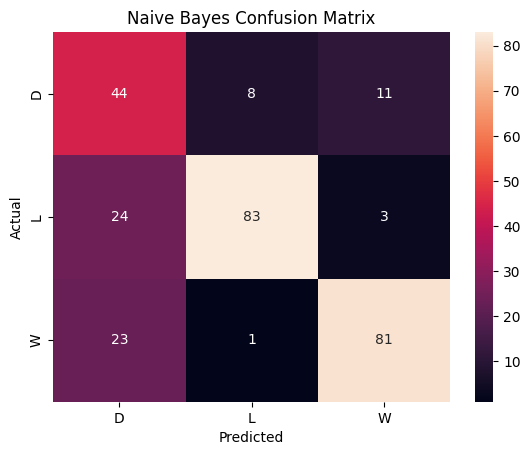

In [ ]:
#visualisation
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


Evaluation

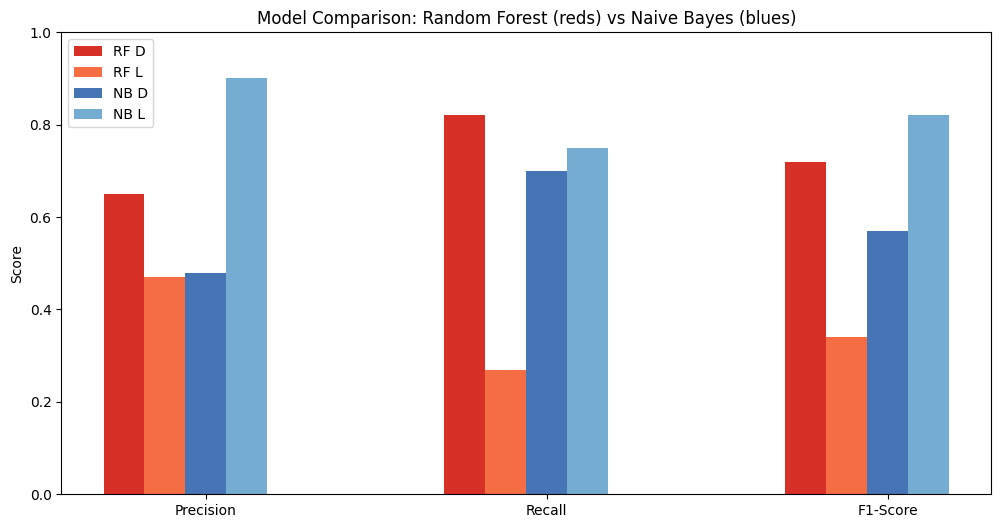

In [273]:
import matplotlib.pyplot as plt
import numpy as np

# Metric values based on your model outputs
metrics = ['Precision', 'Recall', 'F1-Score']
rf_scores = {
    'D': [0.65, 0.82, 0.72],
    'L': [0.47, 0.27, 0.34],
}
nb_scores = {
    'D': [0.48, 0.70, 0.57],
    'L': [0.90, 0.75, 0.82],
}

x = np.arange(len(metrics))
width = 0.12

fig, ax = plt.subplots(figsize=(12, 6))

# More distinct reds for RF bars
rf_colors = ['#d73027', '#f46d43']  # dark red, lighter orange-red

# More distinct blues for NB bars
nb_colors = ['#4575b4', '#74add1', ]  # dark blue to light blue gradient

# Plot RF scores (for D and L) in distinct reds
for i, cls in enumerate(['D', 'L']):
    ax.bar(x + i*width, rf_scores[cls], width, label=f'RF {cls}', color=rf_colors[i])

# Plot NB scores (for D, L, W) in distinct blues
for i, cls in enumerate(['D', 'L']):
    ax.bar(x + (i+2)*width, nb_scores[cls], width, label=f'NB {cls}', color=nb_colors[i])

ax.set_xticks(x + width*2)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Random Forest (reds) vs Naive Bayes (blues)')
ax.legend()

plt.show()




## Model Comparison and Evaluation

The bar chart above compares the precision, recall, and F1-score of the Random Forest (reds) and Naive Bayes (blues) models for Draw (D) and Loss (L) classes. Naive Bayes consistently outperforms Random Forest across all metrics for both classes, particularly showing much higher recall and F1-scores for Loss (L).

It is important to note that this comparison excludes the Win (W) class from Random Forest, as the current training data split did not include win outcomes for this model. This limitation restricts the Random Forest model's ability to predict all match outcomes.

For a fair and complete evaluation, the Random Forest model should be retrained on a dataset incorporating the Win class through stratified sampling and proper feature encoding. Until then, Naive Bayes provides a more comprehensive insight into match outcome prediction in this setting.


